In [1]:
!pip install tweepy python-dotenv japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 6.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=238a23148be02adbb5ae36224ddc509087ea4751db2556e4f02ce4f30dfc3e94
  Stored in directory: /home/jovyan/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize_matplotlib


In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import tweepy
import os

client = tweepy.Client(bearer_token=os.getenv("bearer_token"),
                    consumer_key=os.getenv("api_key"),
                    consumer_secret = os.getenv("api_key_secret"),
                    access_token=os.getenv("access_token"), 
                    access_token_secret=os.getenv("access_token_secret"),
                    wait_on_rate_limit=True)

In [3]:
my_user_id = client.get_me().data.id

In [4]:
following = client.get_users_following(id = my_user_id)
follower = client.get_users_followers(id = my_user_id)

In [5]:
potential_unfollow_users = set(following.data) - set(follower.data)
results = []
for user in potential_unfollow_users:
    user_detail = client.get_user(id = user.id, user_fields=['description', 'public_metrics', 'profile_image_url']).data
    #print(user_detail.name, user_detail.description, user_detail.profile_image_url)
    results.append({'user_name': user_detail.name,
                    'description': user_detail.description, 
                    'followers': user_detail.public_metrics['followers_count'], 
                    'following': user_detail.public_metrics['following_count'], 
                    'tweet': user_detail.public_metrics['tweet_count'], 
                    'listed': user_detail.public_metrics['listed_count']
                   })

In [6]:
potential_unfollow_users = set(following.data) - set(follower.data)

In [7]:
print('フォロー総数: ' + str(len(following.data)))
print('自分だけがフォローしている数: ' + str(len(potential_unfollow_users)))

フォロー総数: 86
自分だけがフォローしている数: 43


In [8]:
import pandas as pd
potential_unfollow_df = pd.DataFrame(results)
potential_unfollow_df.head()

,user_name,description,followers,following,tweet,listed
0,とよ@デイトラWeb制作コース受講前,第一子出産を前に適応障害発症し休職したことを機にフリーランスを目指し活動開始 / デイトラW...,64,120,6,0
1,あや🌼再起動,野菜コンペ→「データサイエンス数学ストラテジスト」受験→Kaggle｜趣味：美術鑑賞&デッサ...,970,1447,9779,3
2,KNE,26歳の時フリーターからフロントエンドエンジニアに未経験から就職しました\nJSよりPHPに...,95,59,2229,0
3,Yusaku Imai,データサイエンティスト/機械学習エンジニア/データアナリスト/データエンジニアを経験し、現在...,36,12,7,0
4,やすなが,都内私大/23卒/24卒/25卒/株式会社リアステージ長期インターン生/毎日笑顔/ 就活垢/...,2431,2674,1266,3


In [9]:
potential_unfollow_df.sort_values(by='followers', inplace=True)

[Text(0.5, 0, 'フォロワー数')]

/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128566 (\N{FACE WITHOUT MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127804 (\N{BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127490 (\N{SQUARED KATAKANA SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabt

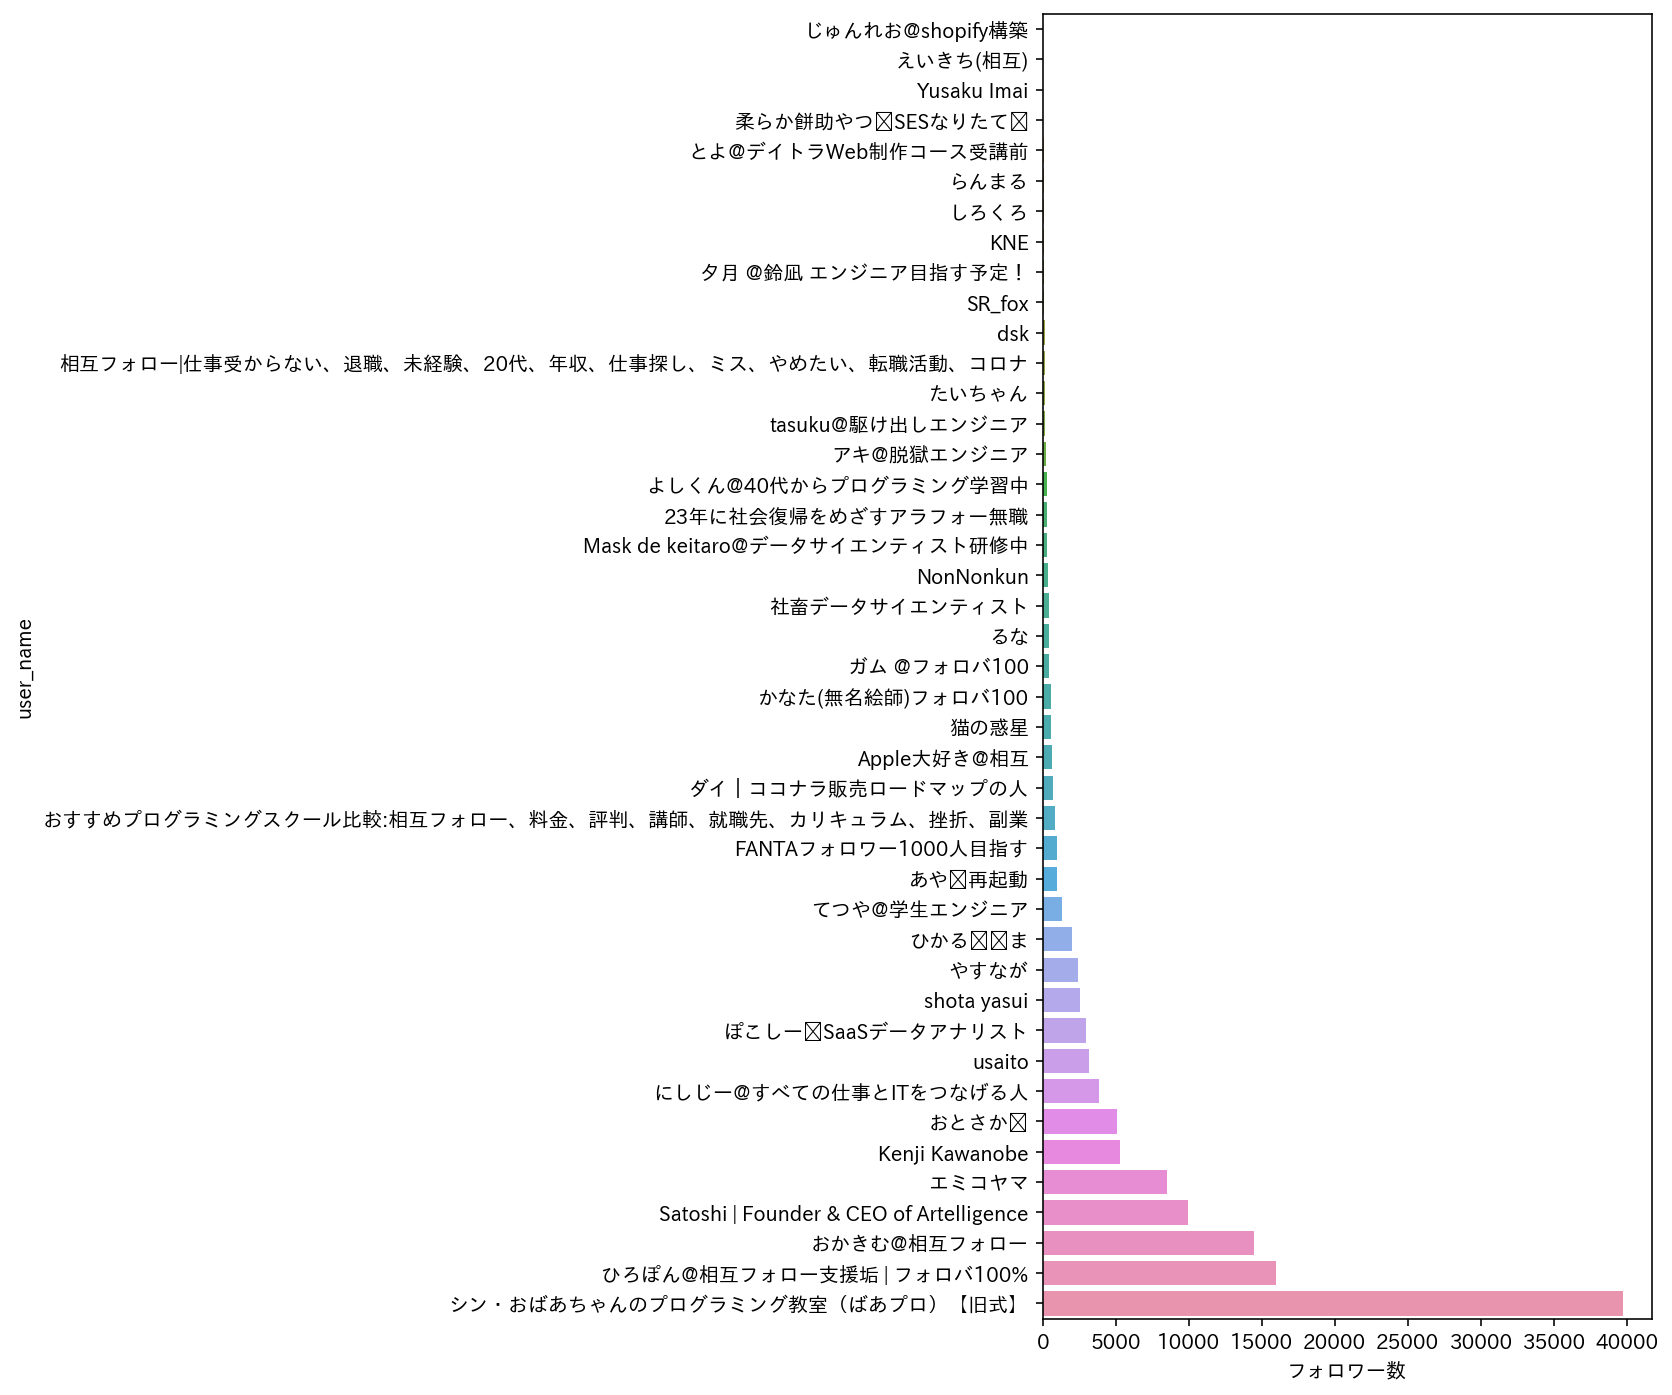

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib
%config InlineBackend.figure_formats = {'png', 'retina'}
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 2, 1) 
sns.barplot(y='user_name', x='followers', data = potential_unfollow_df, ax=ax)
ax.set(xlabel='フォロワー数')